# Baseline Model Notebook

## Unzip the file


In [53]:
import zipfile
import os
zip_file_path = 'cashflow_data.zip'
extract_path = os.path.dirname(zip_file_path)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(zip_file_path))

## Import the datasets and delete the unziped folder

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shutil

consumers = pd.read_parquet("cashflow/consumer_data.parquet")
transactions = pd.read_parquet('cashflow/transactions.parquet')
categories = pd.read_csv('transaction_categories.csv')

#after import to the file, we can delete the unzip folder. 
shutil.rmtree('cashflow')

In [55]:
consumers.head()

,evaluation_date,FPF_TARGET,total_balance,masked_consumer_id
0,2021-08-26,0.0,1380.84,C01100001
1,2022-08-02,0.0,20163.90,C01100002
2,2021-03-04,0.0,3986.25,C01100003
3,2022-11-19,0.0,5956.03,C01100004
4,2021-11-21,0.0,29421.10,C01100005


- Evaluation Date: Date when the customer applied for credit.
- FPF_TARGET: Flag for bads (20% is NA for holdout).
- Total Balance: Account balance as of the evaluation date.
- Consumer ID: consumer/customer identifier (unique key)

16000 unique consumers

In [56]:
consumers['masked_consumer_id'].unique().shape

(16000,)

In [57]:
consumers.shape

(16000, 4)

In [58]:
transactions.shape

(17738083, 5)

In [59]:
transactions.head()

,masked_consumer_id,posted_date,amount,category,masked_transaction_id
2715977,C02103629,2022-08-12,-21.00,27.0,C02T02715977
2715978,C02103629,2022-08-09,-8.60,22.0,C02T02715978
2715979,C02103629,2022-08-07,-30.05,16.0,C02T02715979
2715980,C02103629,2022-09-29,-0.46,0.0,C02T02715980
2715981,C02103629,2022-07-21,-50.00,12.0,C02T02715981


- masked_consumer_id: Anonymized identifier for the consumer associated with the transaction. 
- posted_date: Date when the transaction was recorded in the system.
- amount: The amount of the transaction. Positive value for deposits or credits and a negative value for  debits.
- category: The category or type of the transaction, mapping to actucal categories such as groceries, utilities, entertainment, etc.
- masked_transaction_id: Masked or anonymized identifier for the transaction itself.

In [81]:
categories

,code,description
0,0,SELF_TRANSFER
1,1,EXTERNAL_TRANSFER
2,2,DEPOSIT
3,3,PAYCHECK
4,4,MISCELLANEOUS
5,5,PAYCHECK_PLACEHOLDER
6,6,REFUND
7,7,INVESTMENT_INCOME
8,8,OTHER_BENEFITS
9,9,UNEMPLOYMENT_BENEFITS


In [61]:
# Merging dataframes
merged_df = pd.merge(transactions, categories, left_on='category', right_on='code', how='left')
merged_df = pd.merge(merged_df, consumers, left_on='masked_consumer_id', right_on='masked_consumer_id', how='left')

# Display the first few rows of the merged dataframe
merged_df.head()

,masked_consumer_id,posted_date,amount,category,masked_transaction_id,code,description,evaluation_date,FPF_TARGET,total_balance
0,C02103629,2022-08-12,-21.00,27.0,C02T02715977,27.0,HEALTHCARE_MEDICAL,2022-11-16,1.0,109.53
1,C02103629,2022-08-09,-8.60,22.0,C02T02715978,22.0,ESSENTIAL_SERVICES,2022-11-16,1.0,109.53
2,C02103629,2022-08-07,-30.05,16.0,C02T02715979,16.0,GENERAL_MERCHANDISE,2022-11-16,1.0,109.53
3,C02103629,2022-09-29,-0.46,0.0,C02T02715980,0.0,SELF_TRANSFER,2022-11-16,1.0,109.53
4,C02103629,2022-07-21,-50.00,12.0,C02T02715981,12.0,LOAN,2022-11-16,1.0,109.53


In [62]:
df = merged_df.head(1000)
# df.to_csv('cashflow/data_sample.csv')

In [63]:
merged_df.shape

(17738083, 10)

### Some graphs that helps us better know about the table and data. 

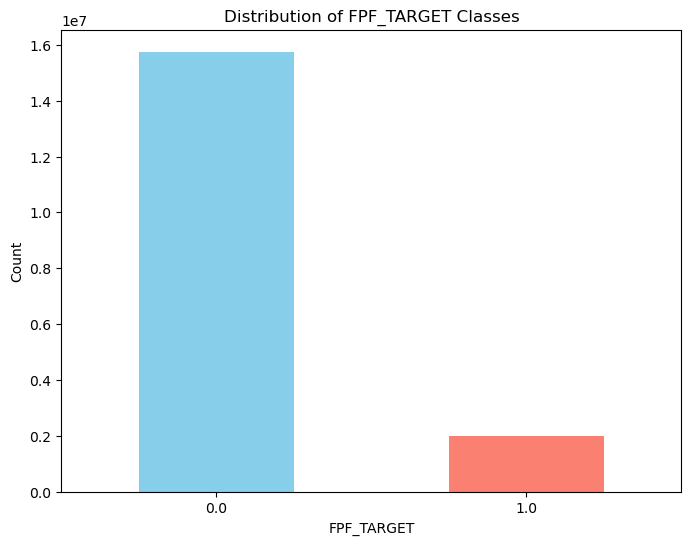

In [64]:
import matplotlib.pyplot as plt

# Count the occurrences of each class in FPF_TARGET
class_counts = merged_df['FPF_TARGET'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('FPF_TARGET')
plt.ylabel('Count')
plt.title('Distribution of FPF_TARGET Classes')
plt.xticks(rotation=0)
plt.show()


In [78]:
merged_df.head()

,posted_date,masked_consumer_id,amount,category,masked_transaction_id,description,evaluation_date,FPF_TARGET,total_balance,posted_date_year,...,code_34.0,code_35.0,code_36.0,code_4.0,code_5.0,code_6.0,code_7.0,code_8.0,code_9.0,code_nan
0,2022-08-12,C02103629,-21.00,27.0,C02T02715977,HEALTHCARE_MEDICAL,2022-11-16,1.0,109.53,2022.0,...,0,0,0,0,0,0,0,0,0,0
1,2022-08-09,C02103629,-8.60,22.0,C02T02715978,ESSENTIAL_SERVICES,2022-11-16,1.0,109.53,2022.0,...,0,0,0,0,0,0,0,0,0,0
2,2022-08-07,C02103629,-30.05,16.0,C02T02715979,GENERAL_MERCHANDISE,2022-11-16,1.0,109.53,2022.0,...,0,0,0,0,0,0,0,0,0,0
3,2022-09-29,C02103629,-0.46,0.0,C02T02715980,SELF_TRANSFER,2022-11-16,1.0,109.53,2022.0,...,0,0,0,0,0,0,0,0,0,0
4,2022-07-21,C02103629,-50.00,12.0,C02T02715981,LOAN,2022-11-16,1.0,109.53,2022.0,...,0,0,0,0,0,0,0,0,0,0


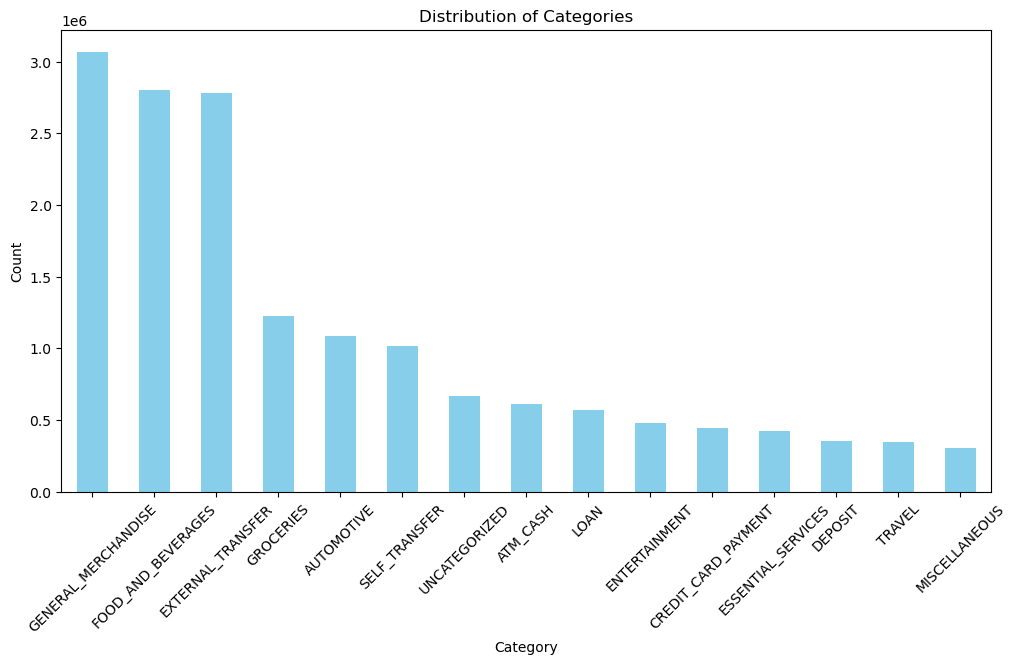

In [82]:
import matplotlib.pyplot as plt

# Create a bar chart for the 'category' column
plt.figure(figsize=(12, 6))
merged_df['description'].value_counts().nlargest(15).plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
plt.show()


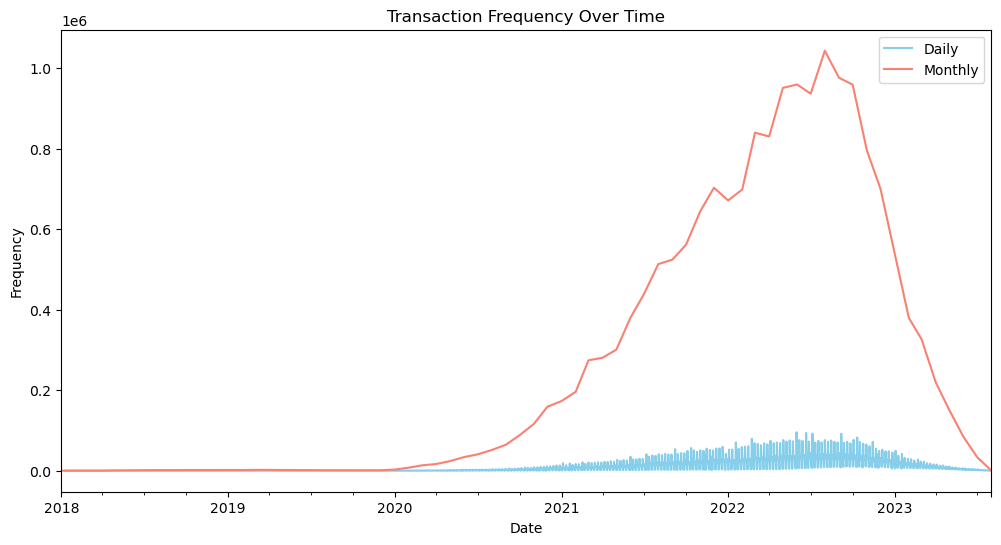

In [66]:
# Convert 'posted_date' to datetime format
merged_df['posted_date'] = pd.to_datetime(merged_df['posted_date'])

# Set 'posted_date' as the index
merged_df.set_index('posted_date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
merged_df.resample('D').size().plot(label='Daily', color='skyblue')
merged_df.resample('M').size().plot(label='Monthly', color='salmon')
plt.title('Transaction Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [67]:
merged_df = merged_df.reset_index()


# Baseline Model (First Milestone)

#### Prof/TA comments or questions (4/16/2024):
1. Calculate loss in this
2. Check the # of defaults per "product" segment and how it's performing across each segment
3. AUC across each segment??
4. Model might be slow so use standard scalar for numeric values to speed up computations
5. Think of feature engineering per user basis (count of transactions per user, avg debit transaction amt , avg credit transaction amt )
6. Increase max iterations in logistic regression (Current 1000)

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

### Basic Features Engineering / Data Manipulation

Done in a hurry to get to the baseline model, needs more work

1. Transaction count per consumer
2. Average Debit Amount per consumer
3. Average Credit Amount per consumer
4. Count of Debits per consumer
5. Count of Credits per consumer
6. Dropped Date Columns (Check how to encode dates), skipped for now
7. Dropped rows with missing nulls
8. Encoded text fields using label encoder

In [69]:
#Converting the date feature to numeric feature
merged_df['evaluation_date'] = pd.to_datetime(merged_df['evaluation_date'])
merged_df['posted_date_year'] = merged_df['posted_date'].dt.year
merged_df['posted_date_month'] = merged_df['posted_date'].dt.month
merged_df['posted_date_day'] = merged_df['posted_date'].dt.day
merged_df['evaluation_date_year'] = merged_df['evaluation_date'].dt.year
merged_df['evaluation_date_month'] = merged_df['evaluation_date'].dt.month
merged_df['evaluation_date_day'] = merged_df['evaluation_date'].dt.day
merged_df.head()

,posted_date,masked_consumer_id,amount,category,masked_transaction_id,code,description,evaluation_date,FPF_TARGET,total_balance,posted_date_year,posted_date_month,posted_date_day,evaluation_date_year,evaluation_date_month,evaluation_date_day
0,2022-08-12,C02103629,-21.00,27.0,C02T02715977,27.0,HEALTHCARE_MEDICAL,2022-11-16,1.0,109.53,2022.0,8.0,12.0,2022,11,16
1,2022-08-09,C02103629,-8.60,22.0,C02T02715978,22.0,ESSENTIAL_SERVICES,2022-11-16,1.0,109.53,2022.0,8.0,9.0,2022,11,16
2,2022-08-07,C02103629,-30.05,16.0,C02T02715979,16.0,GENERAL_MERCHANDISE,2022-11-16,1.0,109.53,2022.0,8.0,7.0,2022,11,16
3,2022-09-29,C02103629,-0.46,0.0,C02T02715980,0.0,SELF_TRANSFER,2022-11-16,1.0,109.53,2022.0,9.0,29.0,2022,11,16
4,2022-07-21,C02103629,-50.00,12.0,C02T02715981,12.0,LOAN,2022-11-16,1.0,109.53,2022.0,7.0,21.0,2022,11,16


In [70]:
merged_df['code'] = merged_df['code'].astype(str)
one_hot_encoded = pd.get_dummies(merged_df['code'], prefix='code')
merged_df = pd.concat([merged_df, one_hot_encoded], axis=1)
merged_df.drop('code', axis=1, inplace=True)
merged_df.head()

,posted_date,masked_consumer_id,amount,category,masked_transaction_id,description,evaluation_date,FPF_TARGET,total_balance,posted_date_year,...,code_34.0,code_35.0,code_36.0,code_4.0,code_5.0,code_6.0,code_7.0,code_8.0,code_9.0,code_nan
0,2022-08-12,C02103629,-21.00,27.0,C02T02715977,HEALTHCARE_MEDICAL,2022-11-16,1.0,109.53,2022.0,...,0,0,0,0,0,0,0,0,0,0
1,2022-08-09,C02103629,-8.60,22.0,C02T02715978,ESSENTIAL_SERVICES,2022-11-16,1.0,109.53,2022.0,...,0,0,0,0,0,0,0,0,0,0
2,2022-08-07,C02103629,-30.05,16.0,C02T02715979,GENERAL_MERCHANDISE,2022-11-16,1.0,109.53,2022.0,...,0,0,0,0,0,0,0,0,0,0
3,2022-09-29,C02103629,-0.46,0.0,C02T02715980,SELF_TRANSFER,2022-11-16,1.0,109.53,2022.0,...,0,0,0,0,0,0,0,0,0,0
4,2022-07-21,C02103629,-50.00,12.0,C02T02715981,LOAN,2022-11-16,1.0,109.53,2022.0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# Drop problematic columns (check how to encode dates)
data = merged_df
data = data.drop(columns=['posted_date', 'evaluation_date', 'description'])

# Encode categorical variables
label_encoder = LabelEncoder()
data['product'] = data['masked_consumer_id'].apply(lambda x: x[:2])
data['product'] = label_encoder.fit_transform(data['product'].astype(str))
data['masked_transaction_id'] = label_encoder.fit_transform(data['masked_transaction_id'].astype(str))

In [72]:
is_credit = merged_df['amount'] > 0
is_debit = merged_df['amount'] < 0

# Create aggregations
consumer_features = merged_df.groupby('masked_consumer_id').agg(
    transactions_count=('masked_consumer_id', 'count'),
    average_debit_amount=('amount', lambda x: x[is_debit].mean()),
    average_credit_amount=('amount', lambda x: x[is_credit].mean()),
    count_of_credits=('amount', lambda x: x[is_credit].count()),
    count_of_debits=('amount', lambda x: x[is_debit].count())
).reset_index()

consumer_features.head()

,masked_consumer_id,transactions_count,average_debit_amount,average_credit_amount,count_of_credits,count_of_debits
0,C01100001,2658,-121.317871,896.000841,309,2349
1,C01100002,2489,-135.926139,904.673323,316,2173
2,C01100003,663,-148.624964,758.367117,111,552
3,C01100004,1084,-151.145475,402.589339,242,842
4,C01100005,2412,-218.482202,787.787646,514,1898


In [73]:
all_feature_df = pd.merge(data, consumer_features, left_on='masked_consumer_id', right_on='masked_consumer_id', how='left')
all_feature_df['masked_consumer_id'] = label_encoder.fit_transform(data['masked_consumer_id'].astype(str))

In [74]:
all_feature_df.head()

,masked_consumer_id,amount,category,masked_transaction_id,FPF_TARGET,total_balance,posted_date_year,posted_date_month,posted_date_day,evaluation_date_year,...,code_7.0,code_8.0,code_9.0,code_nan,product,transactions_count,average_debit_amount,average_credit_amount,count_of_credits,count_of_debits
0,6909,-21.00,27.0,6025240,1.0,109.53,2022.0,8.0,12.0,2022,...,0,0,0,0,0,672,-42.520075,165.738832,137,535
1,6909,-8.60,22.0,6025241,1.0,109.53,2022.0,8.0,9.0,2022,...,0,0,0,0,0,672,-42.520075,165.738832,137,535
2,6909,-30.05,16.0,6025242,1.0,109.53,2022.0,8.0,7.0,2022,...,0,0,0,0,0,672,-42.520075,165.738832,137,535
3,6909,-0.46,0.0,6025244,1.0,109.53,2022.0,9.0,29.0,2022,...,0,0,0,0,0,672,-42.520075,165.738832,137,535
4,6909,-50.00,12.0,6025245,1.0,109.53,2022.0,7.0,21.0,2022,...,0,0,0,0,0,672,-42.520075,165.738832,137,535


#### Only ~122 rows missing, dropping it for now

In [75]:
# Check for missing values
all_feature_df.isnull().sum()

masked_consumer_id          0
amount                    121
category                  121
masked_transaction_id       0
FPF_TARGET                  0
total_balance               1
posted_date_year          121
posted_date_month         121
posted_date_day           121
evaluation_date_year        0
evaluation_date_month       0
evaluation_date_day         0
code_0.0                    0
code_1.0                    0
code_10.0                   0
code_11.0                   0
code_12.0                   0
code_13.0                   0
code_14.0                   0
code_15.0                   0
code_16.0                   0
code_17.0                   0
code_18.0                   0
code_19.0                   0
code_2.0                    0
code_20.0                   0
code_21.0                   0
code_22.0                   0
code_23.0                   0
code_24.0                   0
code_25.0                   0
code_26.0                   0
code_27.0                   0
code_28.0 

In [76]:
all_feature_df = all_feature_df.dropna()
all_feature_df.shape

(17733727, 56)

#### Imputing X values (skipping right now)

In [29]:
# from sklearn.pipeline import make_pipeline
# from sklearn.impute import SimpleImputer

# # Create a pipeline that includes imputation and the logistic regression model
# pipeline = make_pipeline(
#     SimpleImputer(strategy='mean'),  # Impute missing values with the mean of the column
#     LogisticRegression(random_state=42, max_iter=1000)
# )

# # Fit the pipeline on the training data
# pipeline.fit(X_train, y_train)

# # Predict on the test set
# y_pred_pipeline = pipeline.predict(X_test)

# # Evaluate the model
# classification_report_pipeline = classification_report(y_test, y_pred_pipeline)


In [77]:
frac_train = 0.1  # You can adjust this fraction as needed

# Sample a fraction of the data for training
subset = all_feature_df.sample(frac=frac_train, random_state=42)

In [ ]:
#added
X = data.drop(['masked_consumer_id', 'masked_transaction_id', 'FPF_TARGET'], axis=1)
y = data['FPF_TARGET']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X = subset.drop('FPF_TARGET', axis=1)
y = subset['FPF_TARGET']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Fit the Logistic Regression model on the cleaned dataset
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [42]:
# Predict on the test set
y_pred = logistic_model.predict(X_test)

In [43]:
# Evaluate the model
classification_report = classification_report(y_test, y_pred)
print(classification_report)

TypeError: 'str' object is not callable

In [44]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100

print(accuracy)

88.75674913653344


In [45]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for the positive class (class label 1)
y_probabilities = logistic_model.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_score = roc_auc_score(y_test, y_probabilities)
auc_score


0.8130609943449791

In [46]:
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoostRegressor model
ada_boost_model = AdaBoostRegressor(random_state=42)

# Train the model on the subset of data
ada_boost_model.fit(X_train, y_train)

# Make predictions
y_pred_ada_boost = ada_boost_model.predict(X_test)

# Evaluate the model
auc_score = roc_auc_score(y_test, y_pred_ada_boost)
auc_score


0.880109261107672

In [52]:
from sklearn.metrics import accuracy_score

# Define a range of thresholds to try
thresholds = np.linspace(0, 1, 100)  # 100 thresholds between 0 and 1

best_threshold = None
best_accuracy = 0

for threshold in thresholds:
    # Convert regression predictions to binary based on the current threshold
    y_pred_binary = (y_pred_ada_boost >= threshold).astype(int)
    
    # Calculate accuracy for the current threshold
    accuracy = accuracy_score(y_test, y_pred_binary)
    
    # Update best threshold and best accuracy if the current threshold improves accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print("Best Threshold:", best_threshold)
print("Best Accuracy:", best_accuracy)


Best Threshold: 0.4444444444444445
Best Accuracy: 0.9126326919010361


## EDA (ignore for now)

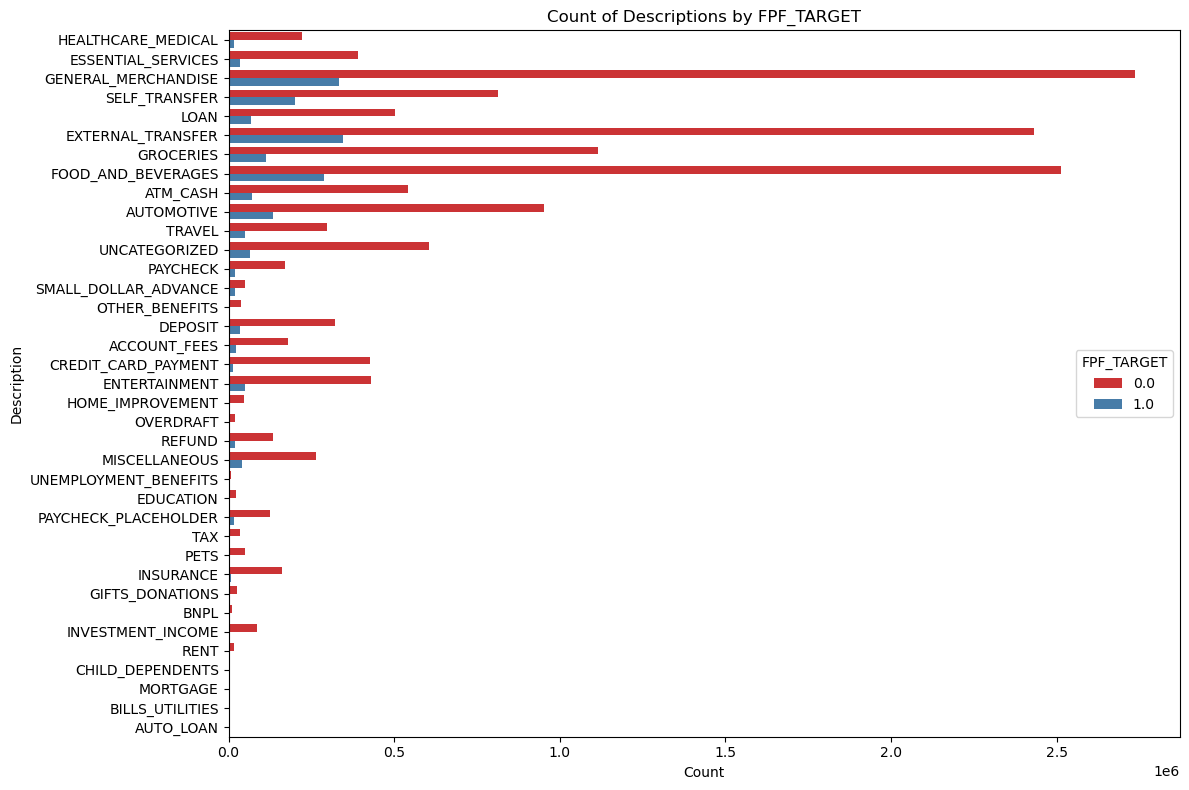

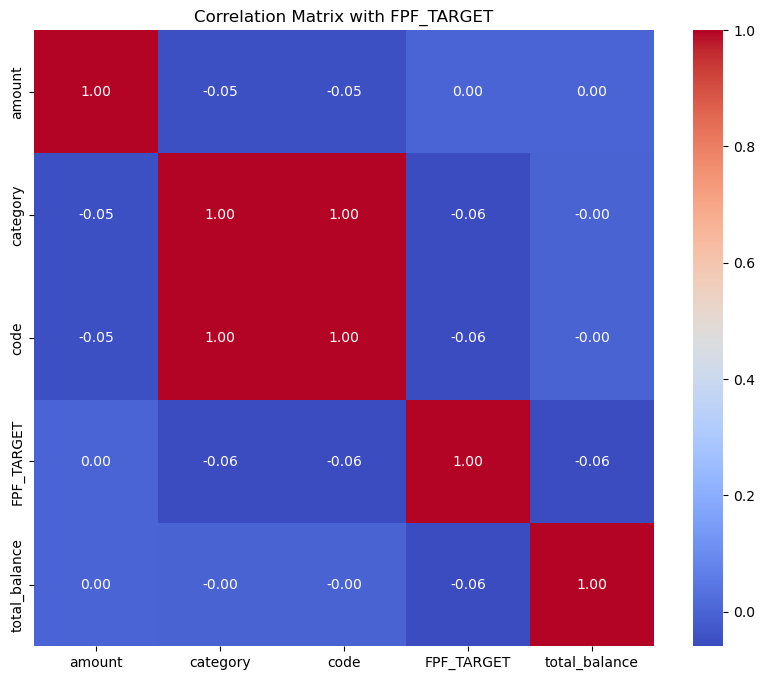

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

data = merged_df

plt.figure(figsize=(12, 8))
sns.countplot(y='description', hue='FPF_TARGET', data=data, palette='Set1')
plt.title('Count of Descriptions by FPF_TARGET')
plt.xlabel('Count')
plt.ylabel('Description')
plt.legend(title='FPF_TARGET')
plt.tight_layout()
plt.show()

# Calculate the correlation matrix
corr_data = data[['amount', 'category',
       'code',
       'FPF_TARGET', 'total_balance']]
correlation_matrix = corr_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with FPF_TARGET')
plt.show()